# Sample Implementation of the Qiskit Teleportation Code in PennyLane
This code demonstrates the implementation of the quantum teleportation protocol using PennyLane. The goal is to highlight and compare the language structure and expressivity of PennyLane with Qiskit.

Tasks:

1.	Compare the Qiskit and PennyLane implementations of quantum teleportation.
2.	Share your thoughts on the expressivity and usability of the two quantum programming languages.


In [1]:
!pip install -q pennylane==0.40.0 pennylane-qiskit

Probabilities of Bob's qubit: [1. 0.]


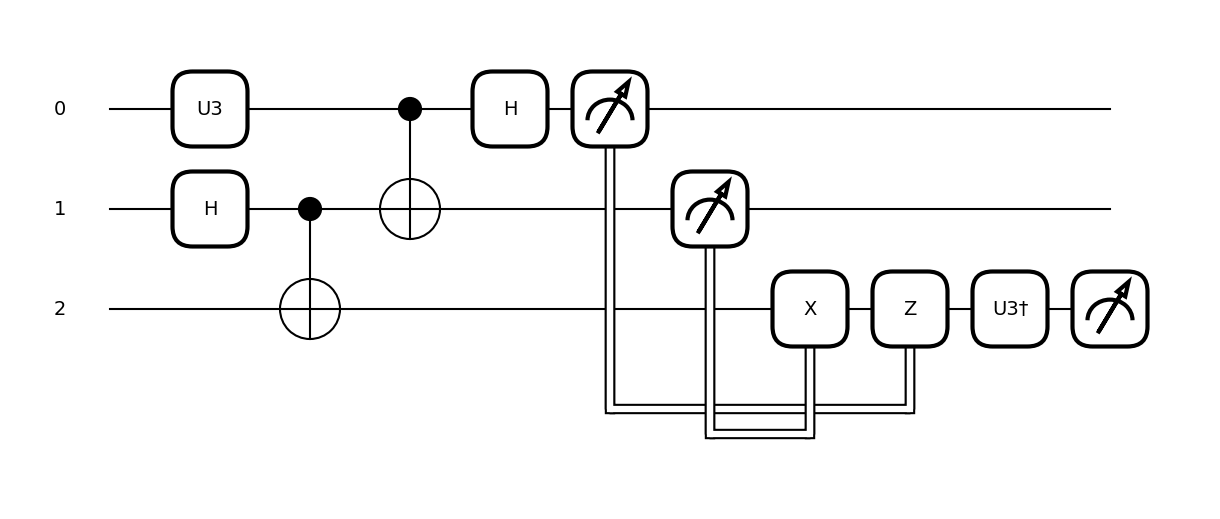

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the PennyLane device, specify the shots count
dev = qml.device("default.qubit", wires=3, shots=1024)

# Step 2: Define the quantum teleportation protocol
@qml.qnode(dev)
def teleportation_circuit(theta, phi, lam):
    # Prepare the random quantum state on wire 0 (Q)
    qml.U3(theta, phi, lam, wires=0)

    # Create the entangled pair (Bell state) between wire 1 (A) and wire 2 (B)
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1, 2])

    # Alice's operations (entangling Q and A)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)

    # Simulate Alice's measurements and apply conditional operations on Bob's qubit
    m0 = qml.measure(wires=0)
    m1 = qml.measure(wires=1)

    qml.cond(m1, qml.PauliX)(wires=2)  # Apply X gate to Bob's qubit if m0 == 1
    qml.cond(m0, qml.PauliZ)(wires=2)  # Apply Z gate to Bob's qubit if m1 == 1

    # Apply the inverse of the random gate to Bob's qubit
    qml.adjoint(qml.U3(theta, phi, lam, wires=2))

    # Output Bob's qubit state (wire 2)
    return qml.probs(wires=2)

# Generate a random single-qubit unitary gate
random_theta = np.random.uniform(0, 2 * np.pi)
random_phi = np.random.uniform(0, 2 * np.pi)
random_lambda = np.random.uniform(0, 2 * np.pi)

# Run the circuit
probs = teleportation_circuit(random_theta, random_phi, random_lambda)

# Print results
# Not sure if it's possible to get the histograms
print("Probabilities of Bob's qubit:", probs)

# Step 10: Visualize the circuit
fig, ax = qml.draw_mpl(teleportation_circuit)(random_theta, random_phi, random_lambda)
plt.show()


To create the circuit using OpenQASM generated by Qiskit, you’ll need an additional package for the QASM plugin (pennylane-qiskit). Currently, PennyLane supports only OpenQASM 2.0. Below is a simple toy example to demonstrate OpenQASM ingestion.

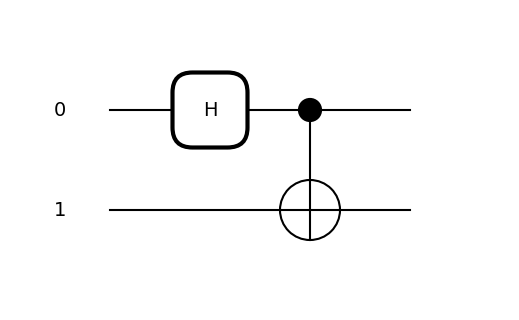

In [3]:
import pennylane as qml

# OpenQASM code as a string
qasm_code = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[2];
h q[0];
cx q[0], q[1];
"""

# Import the QASM circuit from the string
qnode = qml.from_qasm(qasm_code)

# Print the QNode to verify the circuit
fig, ax = qml.draw_mpl(qnode)()
plt.show()

